Importing Pandas and numpy

In [37]:
import pandas as pd
import numpy as np

Feading the data

In [38]:
data = pd.read_csv("IMDB Dataset.csv")
data.dropna()
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [39]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     79999 non-null  object
 1   sentiment  79999 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


,review,sentiment
count,79999,79999
unique,49566,2
top,Not so good movie,negative
freq,43,40192


In [40]:
x=data["review"]
y=data["sentiment"]
x,y

(0        One of the other reviewers has mentioned that ...
 1        A wonderful little production. <br /><br />The...
 2        I thought this was a wonderful way to spend ti...
 3        Basically there's a family where a little boy ...
 4        Petter Mattei's "Love in the Time of Money" is...
                                ...                        
 79994    Dog Bite Dog isn't going to be for everyone, b...
 79995                                    Not so good movie
 79996    Halloween is one of those movies that gets you...
 79997    Halloween is one of those movies that gets you...
 79998    The Truth and Reconciliation process in South ...
 Name: review, Length: 79999, dtype: object,
 0        positive
 1        positive
 2        positive
 3        negative
 4        positive
            ...   
 79994    positive
 79995    negative
 79996    negative
 79997    positive
 79998    positive
 Name: sentiment, Length: 79999, dtype: object)

Splitting the data to test and train (80%,20%)


In [41]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train ,y_test = train_test_split(x,y,train_size=0.8,random_state=2)

In [42]:
#!pip install nltk
from nltk.tokenize import RegexpTokenizer
#for tokexizing the data into
# "my name is"  => ["my","name","is"]

In [43]:
from nltk.stem.porter import PorterStemmer
#cleaning the data like "liking " -> "like"

In [44]:
from nltk.corpus import  stopwords
# to remove the unwanted data like the is

In [45]:
import nltk
nltk.download('stopwords')
# Downloading the stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
#tokenizer with spaceblank
tokenizer = RegexpTokenizer(r"\w+")

en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

this function cleans the data

In [47]:
def getCleanedText(text):
  text = text.lower()
  # tokenizing
  tokens = tokenizer.tokenize(text)
  new_tokens = [token for token in tokens if token not in en_stopwords]
  stemmed_tokens = [ps.stem(tokens) for tokens in new_tokens]
  clean_text = " ".join(stemmed_tokens)
  return clean_text

In [48]:
text = "it is good movie"
getCleanedText(text)


'good movi'

Cleaning the X_train and x_test

In [49]:
# for i in X_train:
#     print(getCleanedText(i))

#X_train cleaning
X_clean = [getCleanedText(i) for i in X_train]
X_clean[1]


'mani movi peopl return home war cope war home worth see portray vietnam vet jeremi collier emilio estevez troubl connect texa famili much movi like tens noth prepar end get reveal br br part make movi good give viewer feel texa gener gap jeremi parent bob martin sheen maurin kathi bate clearli problem son attitud war reject american sister karen kimberli william uncertain side dinner neutral br br american may never abl fulli get vietnam war movi probabl help us look serious affect mani peopl emilio estevez certainli good job direct also star corin nemec carla gugino'

In [50]:
#Y_train cleaning
xt_clean = [getCleanedText(i) for i in X_test]
xt_clean[1]

'consid origin film version haunt top ten film time approach adapt trepid right cautiou film poorli written badli execut load old tosh involv asham origin terrifi child one reason see noth robert wise use innov camera work superb light gener fear work shame new version reli clever special effect pyrotechn get b sadder still ingredi actor liam neeson catherin zeta jone someth differ film watch exampl studio butcheri'

Vectorizing the data to array(numbers)
X_train datas

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X_clean)
X_vec

<63999x65440 sparse matrix of type '<class 'numpy.int64'>'
	with 6024443 stored elements in Compressed Sparse Row format>

In [52]:
feature_names = vectorizer.get_feature_names_out()
print("Feature names:",  feature_names)

Feature names: ['00' '000' '00000000000' ... 'þór' 'יגאל' 'כרמון']


Vectorizing the X_test data

In [53]:
Xt_vect = vectorizer.transform(xt_clean)
Xt_vect

<16000x65440 sparse matrix of type '<class 'numpy.int64'>'
	with 1484676 stored elements in Compressed Sparse Row format>

Model buildling

In [54]:
y_train

14081    positive
14005    positive
67521    positive
31311    negative
21210    positive
           ...   
44295    negative
33867    negative
31019    positive
44566    negative
72173    positive
Name: sentiment, Length: 63999, dtype: object

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_train_encoded = y_train_encoded.reshape(-1,1)
y_train_encoded

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [56]:
y_test_encoded = le.fit_transform(y_test)
y_test_encoded=y_test_encoded.reshape(-1,1)
y_test_encoded

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [57]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_vec,y_train_encoded)


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred = reg.predict(Xt_vect)

In [59]:
cmp = pd.DataFrame(y_test_encoded)
cmp["predict"] = y_pred
cmp

,0,predict
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
15995,0,0
15996,1,1
15997,1,1
15998,1,1


In [60]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,precision_score
print(accuracy_score(y_test_encoded,y_pred),mean_squared_error(y_test_encoded,y_pred),r2_score(y_test_encoded,y_pred),precision_score(y_test_encoded,y_pred))


0.93025 0.06975 0.7209622906695626 0.9269458066138564


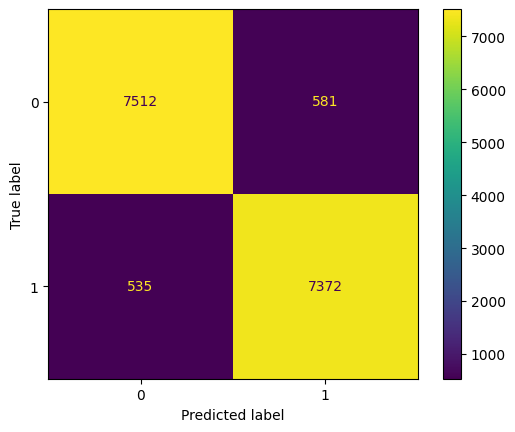

In [61]:
import matplotlib.pyplot as mp
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test_encoded,y_pred)
cm_disp=ConfusionMatrixDisplay(cm)
cm_disp.plot()


In [62]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()

In [63]:
mn.fit(X_vec, y_train)

MultinomialNB()

In [64]:
y_predt = mn.predict(Xt_vect)
y_predt

array(['positive', 'negative', 'negative', ..., 'positive', 'positive',
       'negative'], dtype='<U8')

In [65]:
accuracy_score(y_predt,y_test)

0.8816875

In [66]:
import pickle
pickle.dump(reg,open('model.pkl','wb'))
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
